In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(101)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Transform instance

In [4]:
transform = transforms.ToTensor()

Load CIFAR-10 dataset: train and test

In [5]:
train_data = datasets.CIFAR10(root='train_images/CIFAR_10', train=True, download=True, transform=transform)

Files already downloaded and verified


In [6]:
test_data = datasets.CIFAR10(root='train_images/CIFAR_10', train=False, download=True, transform=transform)

Files already downloaded and verified


Dataloaders

In [7]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

Define labels

In [8]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

Visualize a batch of images

Label: [1 5 8 1 6 1 6 3 7 9]
Class   car   dog  ship   car  frog   car  frog   cat horse truck


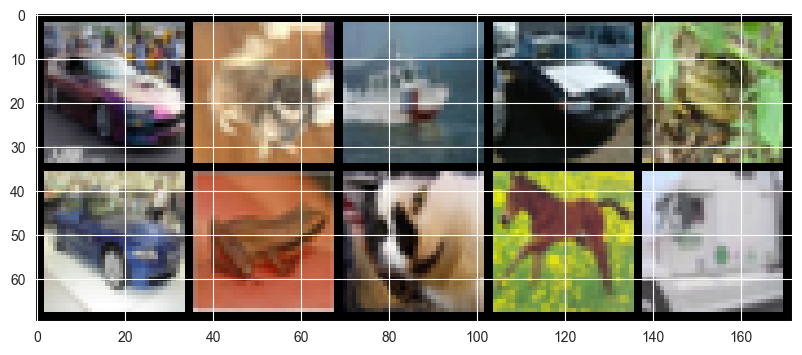

In [9]:
def print_label_images(nrow=5):
    for images, labels in train_loader:
        break
    
    # print the labels
    print('Label:', labels.numpy())
    print('Class', *np.array([class_names[i] for i in labels]))
    
    # print the images
    im = make_grid(images, nrow=nrow)
    plt.figure(figsize=(16, 4))
    plt.imshow(np.transpose(im.numpy(), (1,2, 0)))

print_label_images()

Convolutional Model

In [14]:
in_channels = 3
out_channels = 6
kernel_size = 5 # for squared kernels
stride = 1
padding = 0

batch_size = 1
high_in = 32
width_in = 32

h_out = (high_in +2*padding - kernel_size) // stride + 1 # for squared kernels
w_out = (width_in +2*padding - kernel_size) // stride + 1 # for squared kernels 

c = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
input = torch.rand(batch_size, in_channels, high_in, width_in)
output = c(input)
c_shape = [batch_size, out_channels, h_out, w_out]
print("real output shape", output.shape)
print("predict output shape", c_shape)

real output shape torch.Size([1, 6, 28, 28])
predict output shape [1, 6, 28, 28]
